In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

2016-02-10 11:48:18	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-02-10 11:48:18	Parsing datapackage to create a Study object
2016-02-10 11:49:07	Initializing Study
2016-02-10 11:49:07	Initializing Predictor configuration manager for Study
2016-02-10 11:49:07	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-10 11:49:07	Added ExtraTreesClassifier to default predictors
2016-02-10 11:49:07	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-10 11:49:07	Added ExtraTreesRegressor to default predictors
2016-02-10 11:49:07	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-10 11:49:07	Added GradientBoostingClassifier to default predictors
2016-02-10 11:49:07	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


In [4]:

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]


In [5]:
splicing_grouped = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype)

splicing_mean = splicing_grouped.mean()
splicing_var = splicing_grouped.var()

In [11]:
mean_df = splicing_mean.unstack().reset_index()
mean_df = mean_df.rename(columns={'level_0': 'event_name', 0:'mean'})
mean_df.head()

,event_name,phenotype,mean
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,MN,NaN
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,NPC,NaN
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,iPSC,0.166667
3,exon:chr10:101165513-101165617:-@exon:chr10:10...,MN,0.997024
4,exon:chr10:101165513-101165617:-@exon:chr10:10...,NPC,1.000000


In [10]:
var_df = splicing_var.unstack().reset_index()
var_df = var_df.rename(columns={'level_0': 'event_name', 0:'variance'})
var_df.head()

,event_name,phenotype,variance
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,MN,NaN
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,NPC,NaN
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,iPSC,0.147059
3,exon:chr10:101165513-101165617:-@exon:chr10:10...,MN,0.000142
4,exon:chr10:101165513-101165617:-@exon:chr10:10...,NPC,0.000000


In [12]:
merge_cols = ['event_name', 'phenotype']
modalities_tidy = study.supplemental.modalities_tidy.merge(mean_df, left_on=merge_cols, right_on=merge_cols)
modalities_tidy = modalities_tidy.merge(var_df, left_on=merge_cols, right_on=merge_cols)
modalities_tidy.head()

,phenotype,event_name,modality,mean,variance
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,1.00,0.00
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,1.00,0.00
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,included,1.00,0.00
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,0.05,0.05
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,0.95,0.05


In [15]:
modalities_tidy.columns

Index([u'phenotype', u'event_name', u'modality', u'mean', u'variance'], dtype='object')

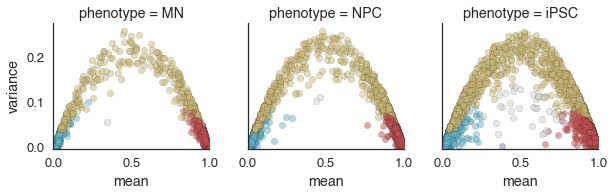

In [29]:
g = sns.FacetGrid(modalities_tidy, col='phenotype', hue='modality', 
                   palette=MODALITY_PALETTE, hue_order=MODALITY_ORDER)
g.map(plt.scatter, 'mean', 'variance', alpha=0.5, edgecolor='#262626', linewidth=0.25, s=40, rasterized=True)
g.set(xlim=(0, 1), ylim=(0, 0.28), xticks=(0, 0.5, 1), yticks=(0, 0.1, 0.2))
g.savefig('{}/mean_vs_variance.pdf'.format(folder), dpi=300)